In [55]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/MyDrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
data = pd.read_csv("/content/gdrive/MyDrive/WSN-DS.csv")
print('Reading Dataset')
print('==================')
print(data)
print('Size of Dataset')
print('==================')
print(data.shape)
print('Data Information')
print('==================')
print(data.info())

Reading Dataset
            id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
0       101000     50       1   101000      0.00000       1       0        0   
1       101001     50       0   101044     75.32345       0       4        1   
2       101002     50       0   101010     46.95453       0       4        1   
3       101003     50       0   101044     64.85231       0       4        1   
4       101004     50       0   101010      4.83341       0       4        1   
...        ...    ...     ...      ...          ...     ...     ...      ...   
374656  201096   1003       0   201051      6.98337       0       5        1   
374657  201097   1003       0   201037     29.32867       0       5        1   
374658  201098   1003       0   201095     18.51963       0       5        1   
374659  201099   1003       0   201051      8.55001       0       5        1   
374660  202041   1025       0   202100      0.00000       0       5        0   

         JOIN_R   SCH_S

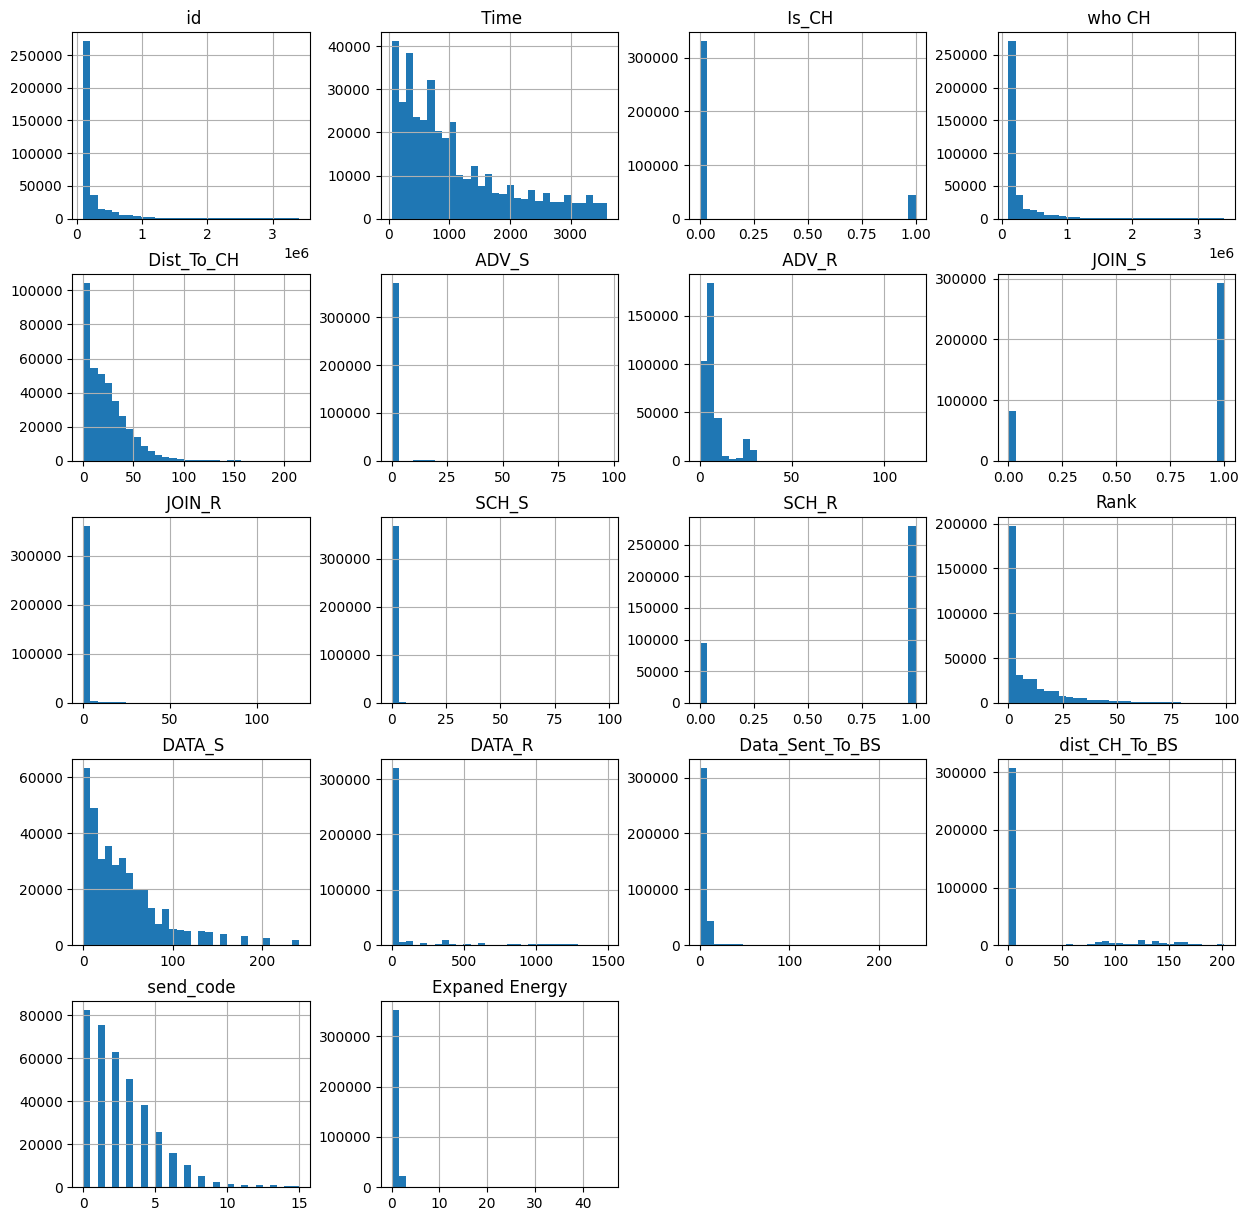

In [57]:
data['Attack type'].value_counts()
# Data visualization to create histogram
data.hist(bins=30, figsize=(15, 15))
plt.show()

Label Data Count
Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: Attack type, dtype: int64


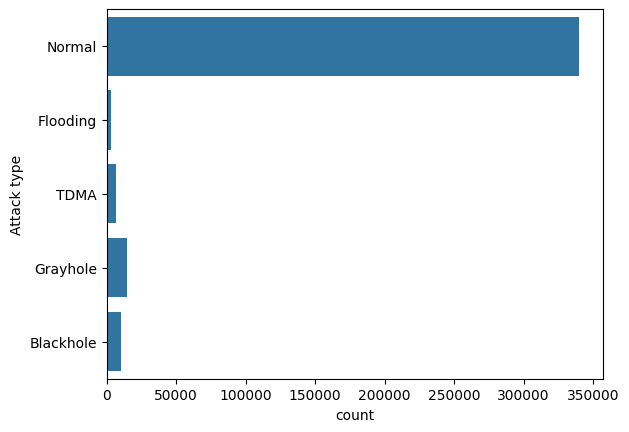

In [58]:
#Categories Information
target_temp = data['Attack type'].value_counts()
print("Label Data Count")
print(target_temp)
ax = sns.countplot(data['Attack type'])

In [59]:
# FEATURE SELECTION & CLASSIFICATION
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import ward, fcluster
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
dt = DecisionTreeClassifier(criterion='gini')
rfc = RandomForestClassifier(criterion='gini')
X= data.drop(columns='Attack type')
X.head()
Y=data['Attack type']
Y=pd.DataFrame(Y)
Y.head()
# Training Data
train_X,test_X,train_Y,test_Y=train_test_split(X,Y,test_size=0.40,random_state=0)
print("Training set has {} samples.".format(train_X.shape[0]))
print("Testing set has {} samples.".format(test_X.shape[0]))

Training set has 224796 samples.
Testing set has 149865 samples.


In [60]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The accuracy is:  99.48420244887065
The precision is:  99.48259086001963
The recall is:  99.48420244887065
The fscore is:  99.4833285557975
Confusion matrix, without normalization


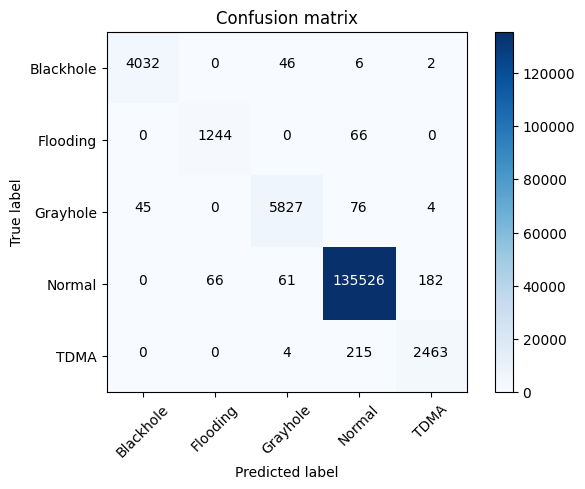

In [61]:
model_dt=dt.fit(train_X,train_Y)
dt_predict=model_dt.predict(test_X)
print('The accuracy is: ' , 100.0 * accuracy_score(dt_predict,test_Y))
precision,recall,fscore,none= precision_recall_fscore_support(dt_predict,test_Y, average='weighted')
print('The precision is: ' , 100.0 * precision)
print('The recall is: ' , 100.0 * recall)
print('The fscore is: ' , 100.0 * fscore)
# print(classification_report(y_true,y_predict))
cm = metrics.confusion_matrix(dt_predict,test_Y)
plot_confusion_matrix(cm, classes=['Blackhole', 'Flooding','Grayhole', 'Normal', 'TDMA'])

The accuracy is:  98.7548793914523
The precision is:  98.81825096445132
The recall is:  98.7548793914523
The fscore is:  98.77545006185467
Confusion matrix, without normalization


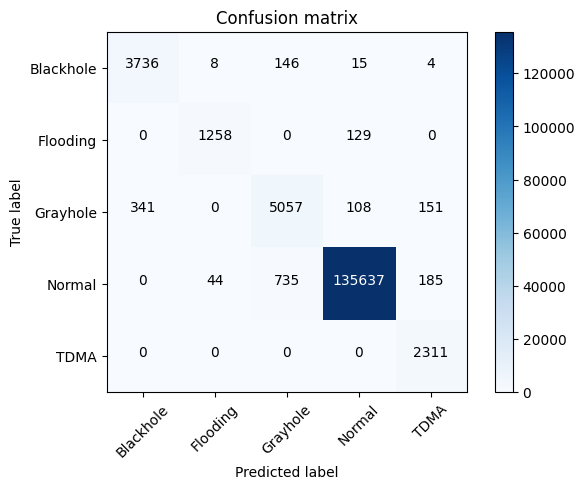

In [62]:
rfc = RandomForestClassifier(max_depth=5)
model_rfc=rfc.fit(train_X,train_Y)
rfc_predict=model_rfc.predict(test_X)
print('The accuracy is: ' , 100.0 * accuracy_score(rfc_predict,test_Y))
precision,recall,fscore,none= precision_recall_fscore_support(rfc_predict,test_Y, average='weighted')
print('The precision is: ' , 100.0 * precision)
print('The recall is: ' , 100.0 * recall)
print('The fscore is: ' , 100.0 * fscore)
# print(classification_report(y_true,y_predict))
cm = metrics.confusion_matrix(rfc_predict,test_Y)
plot_confusion_matrix(cm, classes=['Blackhole', 'Flooding','Grayhole', 'Normal', 'TDMA'])

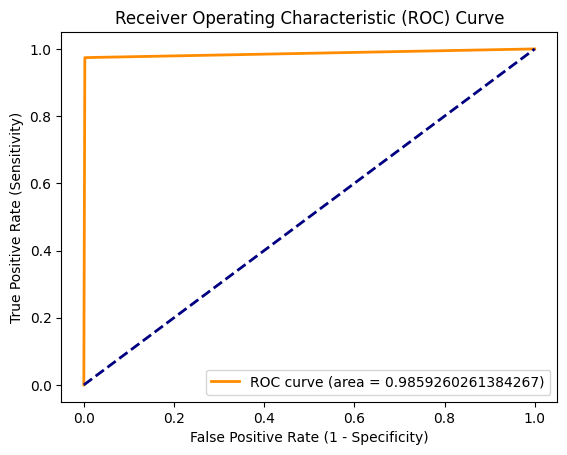

In [81]:
y_predict1=[]
# print('=====DT-Prediction Result=========')
for ii in range(0,len(dt_predict)):
    if(dt_predict[ii]=='Normal'):
      y_predict1.append(0)
    elif(dt_predict[ii]=='Blackhole'):
      y_predict1.append(1)
    elif(dt_predict[ii]=='Grayhole'):
        y_predict1.append(1)
    elif(dt_predict[ii]=='Flooding'):
        y_predict1.append(1)
    elif(dt_predict[ii]=='TDMA'):
        y_predict1.append(1)
y_true1=[]
y_true=test_Y.values.reshape(-1)
# print('=====Test Label=========')
for ii in range(0,len(y_true)):
    if(y_true[ii]=='Normal'):
      y_true1.append(0)
    elif(y_true[ii]=='Blackhole'):
        y_true1.append(1)
    elif(y_true[ii]=='Grayhole'):
        y_true1.append(1)
    elif(y_true[ii]=='Flooding'):
        y_true1.append(1)
    elif(y_true[ii]=='TDMA'):
        y_true1.append(1)
from sklearn.metrics import f1_score,roc_auc_score,roc_curve
fpr, tpr, _ = roc_curve(y_predict1,y_true1)
auc = roc_auc_score(y_predict1,y_true1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

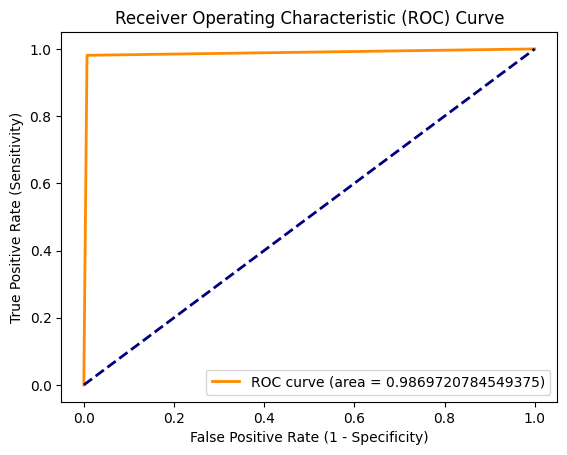

In [82]:
y_predict1=[]
# print('=====RF-Prediction Result=========')
for ii in range(0,len(rfc_predict)):
    if(rfc_predict[ii]=='Normal'):
      y_predict1.append(0)
    elif(rfc_predict[ii]=='Blackhole'):
      y_predict1.append(1)
    elif(rfc_predict[ii]=='Grayhole'):
        y_predict1.append(1)
    elif(rfc_predict[ii]=='Flooding'):
        y_predict1.append(1)
    elif(rfc_predict[ii]=='TDMA'):
        y_predict1.append(1)
y_true1=[]
y_true=test_Y.values.reshape(-1)
# print('=====Test Label=========')
for ii in range(0,len(y_true)):
    if(y_true[ii]=='Normal'):
      y_true1.append(0)
    elif(y_true[ii]=='Blackhole'):
        y_true1.append(1)
    elif(y_true[ii]=='Grayhole'):
        y_true1.append(1)
    elif(y_true[ii]=='Flooding'):
        y_true1.append(1)
    elif(y_true[ii]=='TDMA'):
        y_true1.append(1)
from sklearn.metrics import f1_score,roc_auc_score,roc_curve
fpr, tpr, _ = roc_curve(y_predict1,y_true1)
auc = roc_auc_score(y_predict1,y_true1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [64]:
finput=int(input("Enter Sample ID: "))
inputdata=X[finput:finput+1]
print("WSN-DS Data")
print("=============")
print(inputdata)
prediction=model_dt.predict(inputdata)
print('Attack Detected')
print("=============")
print(prediction[0])


Enter Sample ID: 331325
WSN-DS Data
            id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
331325  903058   2703       1   903100          0.0       1      27        0   

         JOIN_R   SCH_S   SCH_R  Rank   DATA_S   DATA_R   Data_Sent_To_BS  \
331325        0       0       0     0        0        0                 3   

         dist_CH_To_BS   send_code   Expaned Energy  
331325       145.47059            0         0.05278  
Attack Detected
Grayhole
